# 2025 NPS

## Set up

### Import packages

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

pd.options.mode.copy_on_write = True    # Setting to make copy_on_write as default, removing warning 'SettingWithCopyWarning'.


### Upload files
* National Pain Survey 2025 responses
* [Australian Postcodes](https://www.matthewproctor.com/australian_postcodes)

In [92]:
# Read the survey responses. 
df = pd.read_csv('ChronicPainAustralia_DATA_2025-06-08_1506.csv')
print(df.shape)
df.head(5)

(5738, 259)


,record_id,cpa_nps_2025_timestamp,respondent_type,age,gender,gender_txt,state,postcode,income_weekly,first_nations,...,scm_fb,scm_inst,scm_tiktok,scm_tw,scm_yt,scm_pin,scm_reddit,scm_li,consent_marketing,cpa_nps_2025_complete
0,1,[not completed],connection,18-24,male,NaN,NSW,2137.0,ns,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,2025-05-05 14:38:00,peer,35-44,female,NaN,TAS,NaN,3000-3999,ns,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2
2,3,2025-05-05 16:50:24,peer,55-64,male,NaN,NSW,2540.0,2000-2499,ns,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0.0,2
3,4,[not completed],peer,65-74,female,NaN,NSW,2067.0,0500-999,no,...,0.0,0.0,NaN,NaN,3.0,0.0,0.0,0.0,NaN,0
4,5,2025-05-05 16:53:47,peer,55-64,female,NaN,NSW,2113.0,0500-999,no,...,4.0,0.0,0.0,NaN,2.0,0.0,1.0,1.0,1.0,2


In [93]:
df_labels = pd.read_csv('ChronicPainAustralia_DATA_LABELS_2025-06-08_1507.csv')
print(df_labels.shape)
df_labels.head(5)

(5738, 259)


,Record ID,Survey Timestamp,Please select from the following,What is your age?,What gender do you identify with?,"If not listed, please specify",What State or Territory do you live in?,What is your postcode?,"What is your weekly household income, after tax?",Do you identify as a First Nations person?,...,Facebook,Instagram,TikTok,Twitter,YouTube,Pinterest,Reddit,LinkedIn,"Would you like to become a free member of Chronic Pain Australia and get email updates of the latest chronic pain advocacy, news, research and events?",Complete?
0,1,[not completed],I know someone living with pain (e.g. someone ...,18-24,Male,NaN,NSW,2137.0,Prefer not to say,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
1,2,2025-05-05 14:38:00,I am someone living with pain,35-44,Female,NaN,TAS,NaN,$3000 - $3999,Prefer not to say,...,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Yes,Complete
2,3,2025-05-05 16:50:24,I am someone living with pain,55-64,Male,NaN,NSW,2540.0,$2000 - $2499,Prefer not to say,...,NaN,NaN,NaN,NaN,Daily,NaN,NaN,NaN,No,Complete
3,4,[not completed],I am someone living with pain,65-74,Female,NaN,NSW,2067.0,$500 - $999,No,...,Never,Never,NaN,NaN,Weekly,Never,Never,Never,NaN,Incomplete
4,5,2025-05-05 16:53:47,I am someone living with pain,55-64,Female,NaN,NSW,2113.0,$500 - $999,No,...,Daily,Never,Never,NaN,Monthly,Never,Less frequently,Less frequently,Yes,Complete


In [94]:
postcode_lu = pd.read_csv('australian_postcodes.csv')
print(postcode_lu.shape)
postcode_lu.sample(5)

(18526, 41)


,id,postcode,locality,state,long,lat,dc,type,status,sa3,...,altitude,chargezone,phn_code,phn_name,lgaregion,lgacode,electorate,electoraterating,sed_code,sed_name
6753,6707,3221,KENNETT RIVER,VIC,144.427419,-38.181608,WYE RIVER LPO,Delivery Area,Updated 6-Feb-2020,21702.0,...,8.327033,V2,PHN206,Western Victoria,Greater Geelong,22750.0,Corangamite,Provincial,27708.0,South Barwon (Western Victoria)
14302,15442,5223,NEWLAND,SA,137.541715,-35.811358,KINGSCOTE,Delivery Area,Updated 4-Dec-2022,40701.0,...,8.722962,S2,PHN402,Country SA,Kangaroo Island,42750.0,Mayo,Rural,40030.0,Mawson
17843,10301,7116,CASTLE FORBES BAY,TAS,147.034350,-43.262123,HUONVILLE,Delivery Area,Updated 6-Feb-2020,60302.0,...,NaN,T1,PHN601,Tasmania,Central Highlands (Tas.),61010.0,Franklin,Outer Metropolitan,60501.0,Lyons (Derwent)
15054,21543,5440,WEEKEROO,SA,139.967820,-32.216529,SA Country 5,Delivery Area,Updated 4-Dec-2022,40703.0,...,352.209045,S2,PHN402,Country SA,Peterborough,45540.0,Grey,Rural,40041.0,Stuart
9470,8575,3911,LANGWARRIN SOUTH,VIC,145.169556,-38.196908,BAXTER DELIVERY ANNEXE,Delivery Area,Updated 6-Feb-2020,21402.0,...,49.421021,V1,PHN203,South Eastern Melbourne,Frankston,22170.0,Flinders,Rural,25301.0,Mornington (Eastern Victoria)


### Pre-processing responses

In [98]:
def compare_dataframe_rows(df1, df2, df1_col_name):
    """
    Compare two dataframes row by row and return a boolean series indicating if the rows match.
    """
    match = True
    for i in range(5):
        random_row = random.randint(0, df.shape[0]-1)
        timestamp_col = df1.columns.get_loc(df1_col_name)
        match = df1.iloc[random_row, timestamp_col] == df2.iloc[random_row, timestamp_col]

    if not match:
        print(f"Row {random_row} does not match between the two dataframes.")
        print(f"df1: {df1.iloc[random_row, timestamp_col]}")
        print(f"df2: {df2.iloc[random_row, timestamp_col]}")

    elif not (df1.shape == df2.shape):
        print(f"Dataframe shapes do not match. df1.shape: {df1.shape}, df2.shape: {df2.shape}")
        
    else:
        print(f"Dataframes MATCH is True.")


**Label completion rates.**
1. Create a new field 'completion_rate'.
2. Label COMPLETED responses. i.e. with a timestamp.
3. Label PARTIAL COMPLETION if responses have Respondent Type, Age, and either Gender or Postcode.
4. Label INCOMPLETE to everything else. 

In [99]:
# LABEL Completion Rates. 
df['completion_rate'] = np.nan      # Create new field.
df.loc[df['cpa_nps_2025_timestamp'] != '[not completed]', 'completion_rate'] = 'Completed'  # Label COMPLETED.

# Label PARTIAL COMPLETION
df.loc[(df['completion_rate'].isna() & df['respondent_type'].notna() & df['age'].notna() & df['gender'].notna()), 'completion_rate'] = 'Partial completion'                
df.loc[(df['completion_rate'].isna() & df['respondent_type'].notna() & df['age'].notna() & df['postcode'].notna()), 'completion_rate'] = 'Partial completion'

df.loc[(df['completion_rate'].isna()), 'completion_rate'] = 'Incomplete'    # Label INCOMPLETE. 

df_labels['Completion Rate'] = df['completion_rate']  # Add completion rate to labels dataframe.

compare_dataframe_rows(df, df_labels, 'cpa_nps_2025_timestamp')

Dataframes MATCH is True.


Drop incomplete responses

In [101]:
# Drop incomplete responses.
df = df.loc[df['completion_rate'] != 'Incomplete']
# Reset index after dropping rows.
df.reset_index(drop=True, inplace=True)

# Drop rows with 'Incomplete' completion rate from labels dataframe.
df_labels = df_labels.loc[df_labels['Completion Rate'] != 'Incomplete']
# Reset index after dropping rows.  
df_labels.reset_index(drop=True, inplace=True)

compare_dataframe_rows(df, df_labels, 'cpa_nps_2025_timestamp')

Dataframes MATCH is True.


Correct State WA

In [102]:
# Corrected State = WA.
df.loc[df['state'] == '8', 'state'] = 'WA'
df['state'].unique()


array(['NSW', 'TAS', 'SA', 'QLD', 'VIC', 'ACT', 'WA', 'NT', nan],
      dtype=object)

### Postcode Lookup

In [103]:
# Filter postcode lookup to relevant columns and remove duplicate postcode and state.
postcode_lu = postcode_lu[['postcode', 'state', 'region', 'electoraterating', 'long', 'lat',   'lgaregion', 'electorate']]
postcode_lu = postcode_lu.drop_duplicates(subset=['postcode','state'], keep='last')
postcode_lu.shape

(3192, 8)

In [ ]:
# Append Postcode Lookup to DataFrame.
print('df shape before:', df.shape)
df['postcode'] = df['postcode'].astype('Int64')     # Change postcode dtype.
df.loc[df['postcode'].isna(), 'postcode'] = 0       # Remove NaN values in postcode and replace with 0.
df = pd.merge(df, postcode_lu, on=['postcode', 'state'], how='left')    # Left join lookup postcodes to DF. 
print('df shape after:', df.shape)


df shape before: (4986, 260)
df shape after: (4986, 266)


In [110]:
# Add labels to the labels dataframe.
df_labels['What is your postcode?'] = df['postcode']  # Add postcode to labels dataframe.
df_labels['What State or Territory do you live in?'] = df['state']  # Add state to labels dataframe.
df_labels['Region'] = df['region']  # Add region to labels dataframe.
df_labels['Electorate Rating'] = df['electoraterating']  # Add electorate rating to labels dataframe.
df_labels['Longitude'] = df['long']  # Add longitude to labels dataframe.
df_labels['Latitude'] = df['lat']  # Add latitude to labels dataframe.
df_labels['LGA Region'] = df['lgaregion']  # Add LGA region to labels dataframe.
df_labels['Electorate'] = df['electorate']  # Add electorate to labels dataframe.
compare_dataframe_rows(df, df_labels, 'cpa_nps_2025_timestamp')


Dataframes MATCH is True.


### Identify Long Question Headers and Short IDs.

In [114]:
# Print headers for both dataframes.
headers_long = df_labels.columns.tolist()
headers_short = df.columns.tolist()
print(headers_short)
print(headers_long)

['record_id', 'cpa_nps_2025_timestamp', 'respondent_type', 'age', 'gender', 'gender_txt', 'state', 'postcode', 'income_weekly', 'first_nations', 'lgbtq', 'multi_cultural', 'dx___autism', 'dx___adhd', 'dx___dyscalculia', 'dx___dyslexia', 'dx___dyspraxia', 'dx___epilepsy', 'dx___apd', 'dx___id', 'dx___ts', 'dx___na', 'dx___ns', 'dx___nl', 'dx_txt', 'pn_type___back', 'pn_type___neck', 'pn_type___joint', 'pn_type___migraines', 'pn_type___widespread', 'pn_type___osteoarthritis', 'pn_type___rheumatoid_arthritis', 'pn_type___pelvic', 'pn_type___abdominal', 'pn_type___crps', 'pn_type___nerve', 'pn_type___connective_tissue_disorder', 'pn_type___na', 'pn_type___nl', 'pn_type_txt', 'pn_impact', 'hc_dx_length', 'work', 'life_xp___mental_health', 'life_xp___ptsd', 'life_xp___dims', 'life_xp___unable_work', 'life_xp___low_productivity', 'life_xp___strain_financial', 'life_xp___strain_family', 'life_xp___strain_friends', 'life_xp___unable_family', 'life_xp___less_intimacy', 'life_xp___inactivity', 'l

### Functions

In [122]:
def convert_to_categorical(df, col_name):
    '''
    Converts columns into Categorical dtype.
    '''

    # Relabelling na, nl and ns.
    df.loc[df[col_name] == 'na', col_name] = 'Not Applicable'  
    df.loc[df[col_name] == 'nl', col_name] = 'Not Listed'
    df.loc[df[col_name] == 'ns', col_name] = 'Not Stated'

    # Fill NaN with 'Not Stated'.
    if (df[col_name].count() < df.shape[0]):                    
        df.loc[df[col_name].isna(), col_name] = 'Not Stated'    
    
    # Sort categories and make into proper case. 
    category = df[col_name].unique().tolist()
    if col_name == 'state':
        for c in category:
            df.loc[df[col_name] == c, col_name] = c.upper()
        category = [c.upper() for c in category]
    else: 
        for c in category:
            df.loc[df[col_name] == c, col_name] = c.title()
        category = [c.title() for c in category]
    # category.sort()
    df[col_name] = pd.Categorical(df[col_name], categories=category, ordered=True)

    return df[col_name]


## Who is in pain?

### Define df_who dataframe and make categorical columns.

In [123]:
# Defining the fields in the dataframe. 
df_who = df[['record_id',
 'respondent_type',
 'completion_rate',
 'age',
 'gender',
 'gender_txt',
 'state',
 'postcode',
 'income_weekly',
 'first_nations',
 'lgbtq',
 'multi_cultural',
 'dx___autism',
 'dx___adhd',
 'dx___dyscalculia',
 'dx___dyslexia',
 'dx___dyspraxia',
 'dx___epilepsy',
 'dx___apd',
 'dx___id',
 'dx___ts',
 'dx___na',
 'dx___ns',
 'dx___nl',
 'dx_txt']]

In [152]:
# Convert columns into Categoricals.
for i in df_who.columns.to_list():
    if (i in ['record_id', 'gender_txt','dx_txt', 'postcode']): continue    # Skip specific fields. 
    if (df_who[i].dtype == np.int64): continue                              # Skip int64 dtypes.
    if (df_who[i].dtype == 'category'): continue                              # Skip int64 dtypes.
    df_who[i] = convert_to_categorical(df_who, i)                           # Convert column into categorical.



In [165]:
# cross tabulation of column1 and column 2 as an annotated heatmap as percentage of total.
def plot_annotated_heatmap(data, col1, col2, title):
    """
    Plot an annotated heatmap of the cross-tabulation of two categorical variables.
    """
    # Create crosstab and sort the index and columns.
    crosstab = pd.crosstab(data[col1], data[col2], normalize='all') * 100
    crosstab = crosstab.reindex(sorted(crosstab.columns), axis=1)  # Sort columns by label
    crosstab = crosstab.reindex(sorted(crosstab.index), axis=0)  # Sort rows by label

    # Create a heatmap using matplotlib.
    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.matshow(crosstab, cmap='viridis')
    # plt.colorbar(cax)

    # Annotate the heatmap with percentages.
    for (i, j), val in np.ndenumerate(crosstab):
        # Adjust text colour based on value for better visibility.
        text_color = 'white' if val < crosstab.max().max()//2 else 'black'
        ax.text(j, i, f'{val:.1f}%', ha='center', va='center', color=text_color)

    # Set ticks and labels.
    ax.set_xticks(np.arange(len(crosstab.columns)))
    ax.set_yticks(np.arange(len(crosstab.index)))
    ax.set_xticklabels(crosstab.columns)
    ax.set_yticklabels(crosstab.index)
    
    plt.title(title)
    plt.xlabel(col2)
    plt.ylabel(col1)
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()


In [173]:
# cross tabulation of respondent type and age as a table.
def plot_crosstab_table(df, col1, col2):
    """
    Plot a crosstab table of two columns in a DataFrame.
    """
    crosstab = pd.crosstab(df[col1], df[col2])
    crosstab = crosstab.reindex(sorted(crosstab.columns), axis=1)  # Sort columns by label
    crosstab = crosstab.reindex(sorted(crosstab.index), axis=0)  # Sort rows by label

    # print the crosstab table in a readable format.
    print("\nCrosstabulation of", col1, "and", col2)
    print(crosstab)


### dfs


Crosstabulation of respondent_type and age
age              18-24  25-34  35-44  45-54  55-64  65-74  75-84  85-110
respondent_type                                                         
Both                24     70    118    172    184     92     26       2
Carer               12      9     16     34     18     10      8       2
Connection           2      3      7      5      7      6      2       1
Not Applicable       0      1      0      1      0      0      1       1
Peer               103    301    544   1022   1185    759    208      30


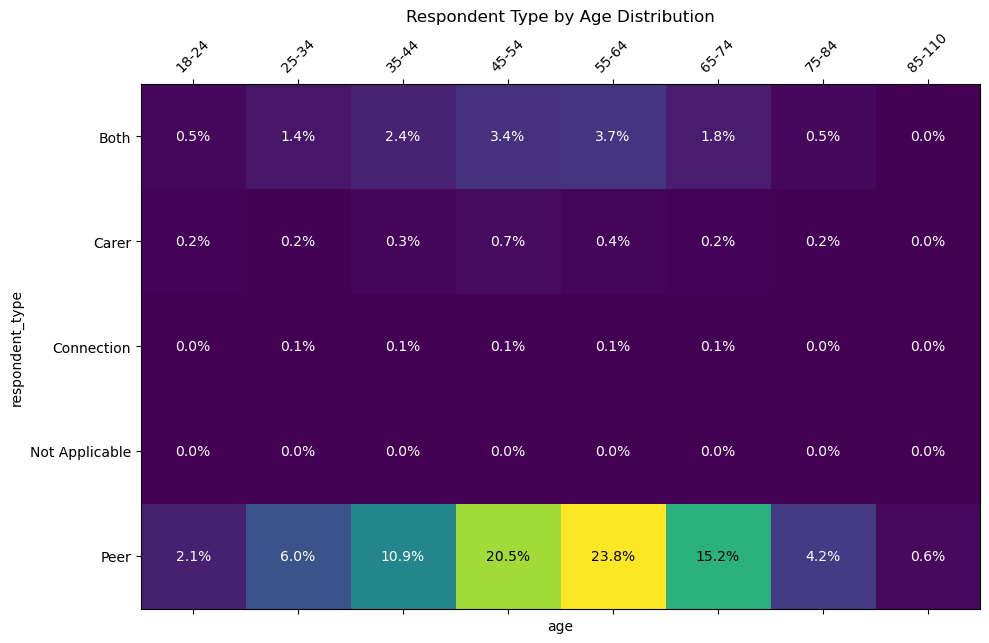

In [174]:
# Plot crosstab table of respondent type vs age.
crosstab_table = plot_crosstab_table(df_who, 'respondent_type', 'age')

# Plotting the annotated heatmap for respondent type and age.
plot_annotated_heatmap(df_who, 'respondent_type', 'age', 'Respondent Type by Age Distribution')


In [ ]:
plot_annotated_heatmap(df_who, 'respondent_type', 'completion_rate', 'Respondent Type by Completion Rate')

### Response summary

In [15]:
def show_summary_histogram(df, col_name):
    print(col_name.upper(), ' | Count Values:', df[col_name].count())
    print(df[col_name].value_counts())
    df = df.sort_values(by=col_name)
    plt.hist(df[col_name], bins=df[col_name].nunique())
    plt.tick_params('x', rotation=35)
    plt.ylabel('Total Count')
    plt.title(col_name.upper())
    plt.show()
    # df[col_name].hist()

In [20]:
pd.pivot_table(df_who, values='record_id', index='respondent_type', columns='gender', aggfunc='count')

gender,Female,Male,Non_Binary,Not Listed,Not Stated
respondent_type,,,,,
Both,595,43,24,3,23
Carer,59,42,1,0,7
Connection,21,9,2,0,1
Not Applicable,1,3,0,0,0
Peer,3459,417,83,4,189


RESPONDENT_TYPE  | Count Values: 4986
Peer              4152
Both               688
Carer              109
Connection          33
Not Applicable       4
Name: respondent_type, dtype: int64


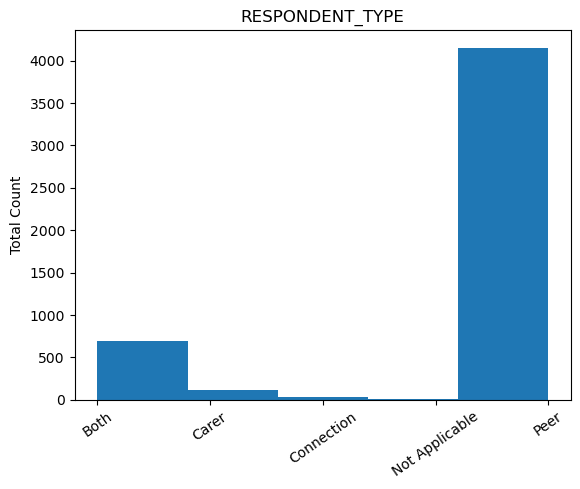

COMPLETION_RATE  | Count Values: 4986
Completed             4030
Partial Completion     956
Name: completion_rate, dtype: int64


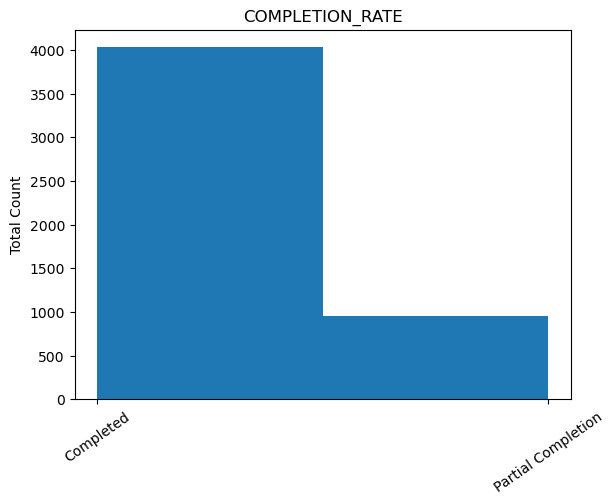

AGE  | Count Values: 4986
55-64     1394
45-54     1234
65-74      867
35-44      685
25-34      384
75-84      245
18-24      141
85-110      36
Name: age, dtype: int64


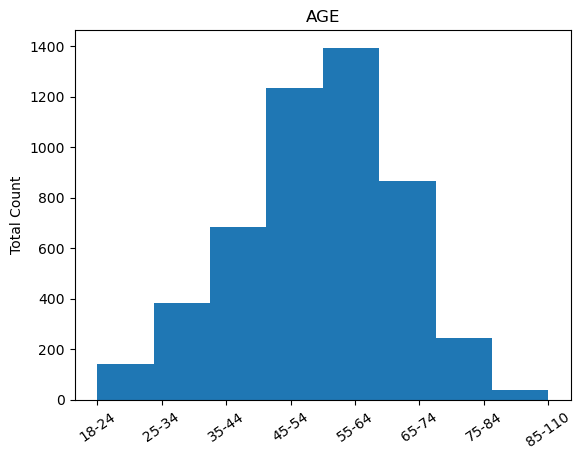

GENDER  | Count Values: 4986
Female        4135
Male           514
Not Stated     220
Non_Binary     110
Not Listed       7
Name: gender, dtype: int64


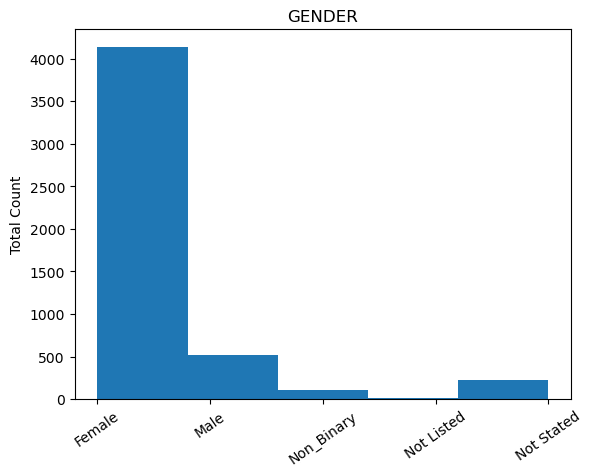

STATE  | Count Values: 4986
NSW           1276
QLD           1274
VIC           1154
SA             471
WA             409
TAS            196
ACT            160
NT              29
NOT STATED      17
Name: state, dtype: int64


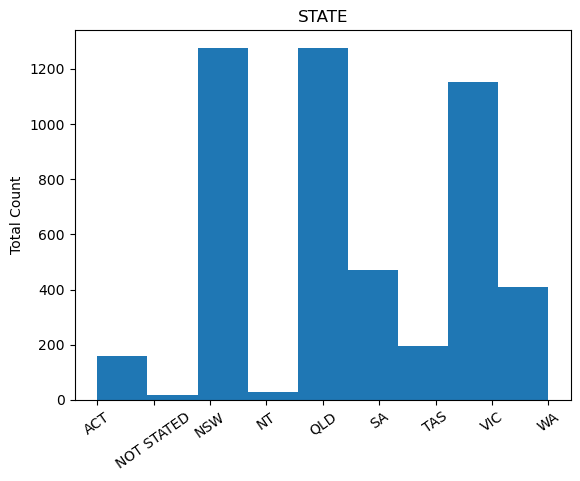

INCOME_WEEKLY  | Count Values: 4986
0500-999      1352
Not Stated     821
0001-499       724
1000-1499      678
0000           432
1500-1999      408
2000-2499      218
2500-2999      147
3000-3999       94
5000            72
4000-4999       40
Name: income_weekly, dtype: int64


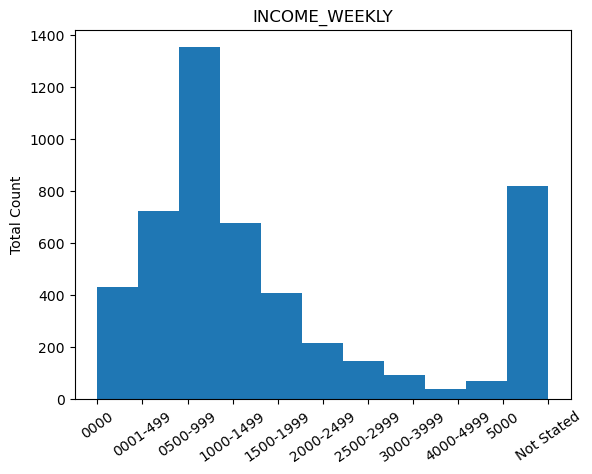

FIRST_NATIONS  | Count Values: 4986
No            4490
Not Stated     302
Yes            194
Name: first_nations, dtype: int64


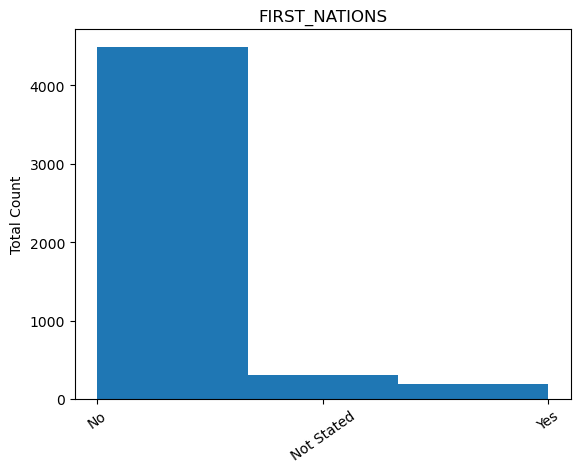

LGBTQ  | Count Values: 4986
No            4191
Yes            612
Not Stated     183
Name: lgbtq, dtype: int64


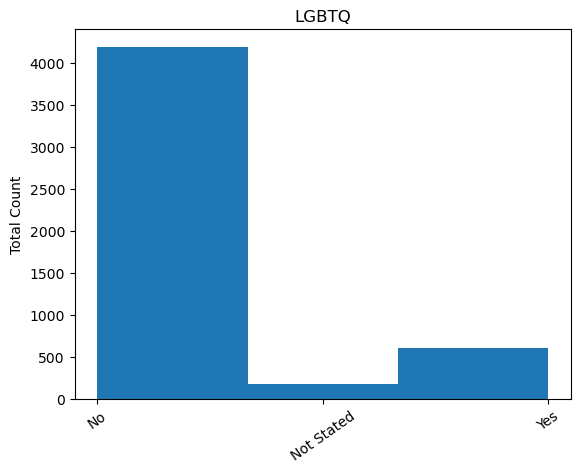

MULTI_CULTURAL  | Count Values: 4986
No            4439
Yes            341
Not Stated     206
Name: multi_cultural, dtype: int64


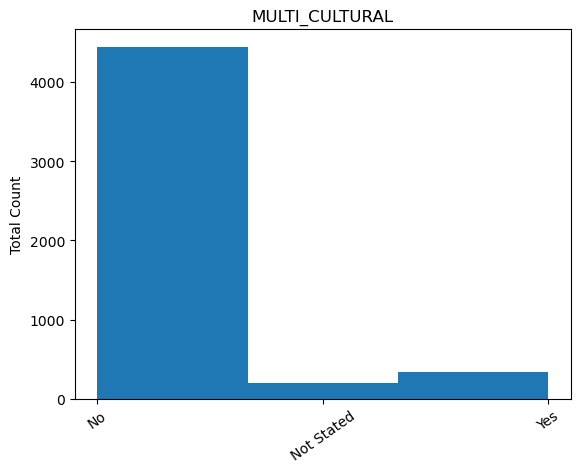

DX___AUTISM  | Count Values: 4986
0    4564
1     422
Name: dx___autism, dtype: int64


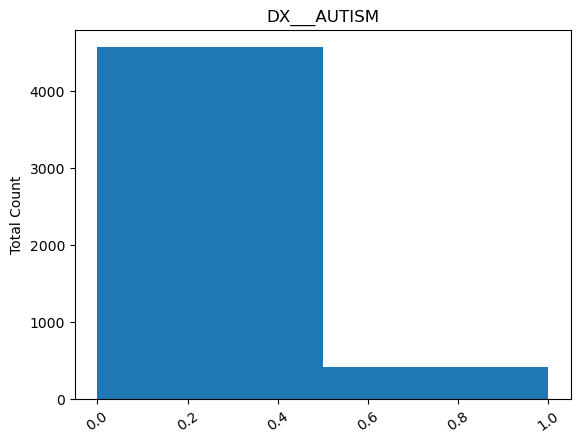

DX___ADHD  | Count Values: 4986
0    4264
1     722
Name: dx___adhd, dtype: int64


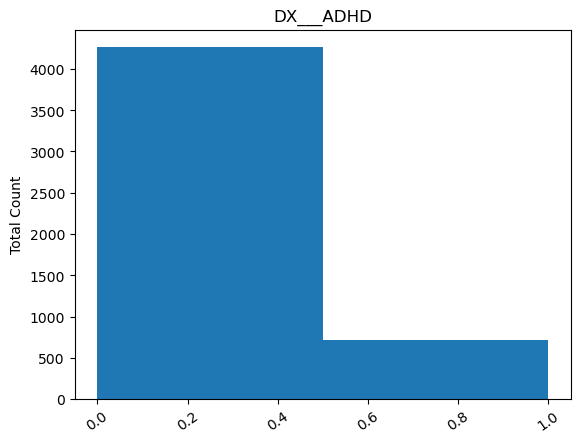

DX___DYSCALCULIA  | Count Values: 4986
0    4905
1      81
Name: dx___dyscalculia, dtype: int64


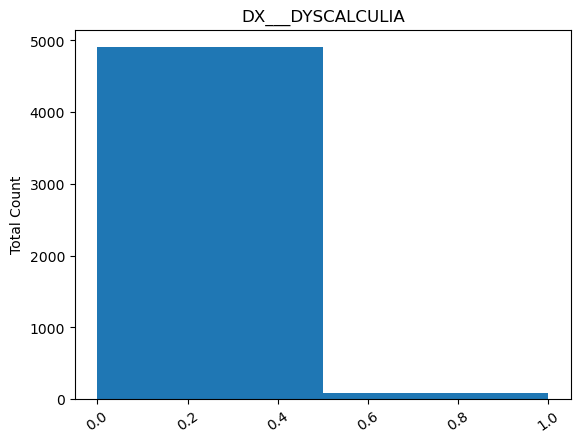

DX___DYSLEXIA  | Count Values: 4986
0    4820
1     166
Name: dx___dyslexia, dtype: int64


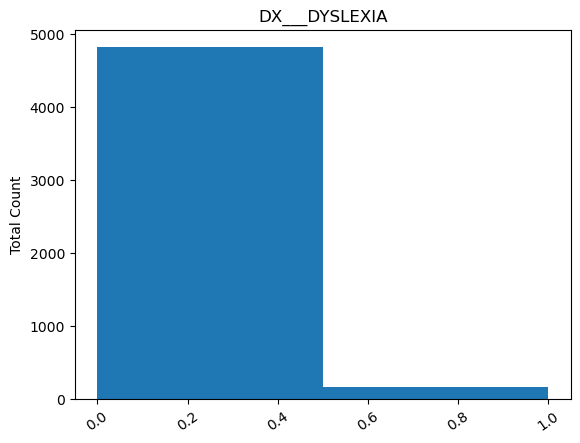

DX___DYSPRAXIA  | Count Values: 4986
0    4926
1      60
Name: dx___dyspraxia, dtype: int64


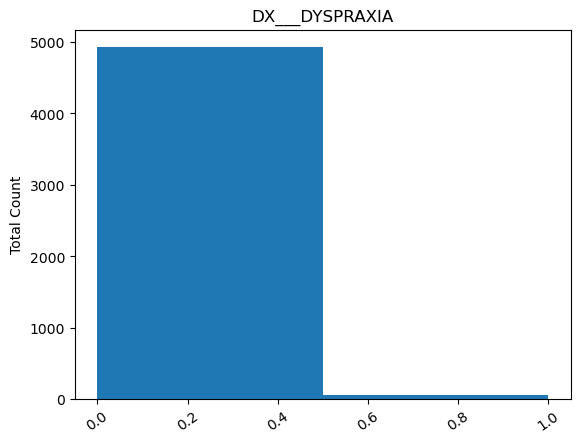

DX___EPILEPSY  | Count Values: 4986
0    4891
1      95
Name: dx___epilepsy, dtype: int64


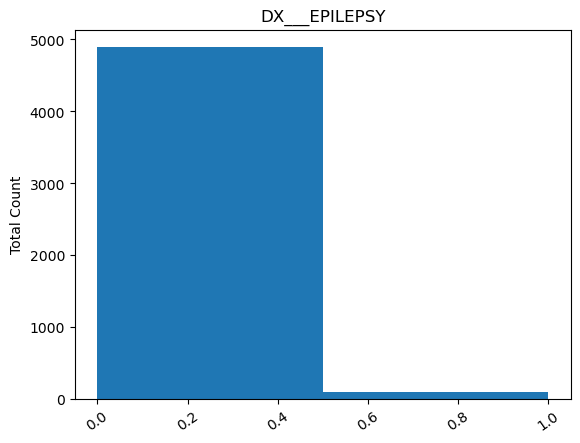

DX___APD  | Count Values: 4986
0    4867
1     119
Name: dx___apd, dtype: int64


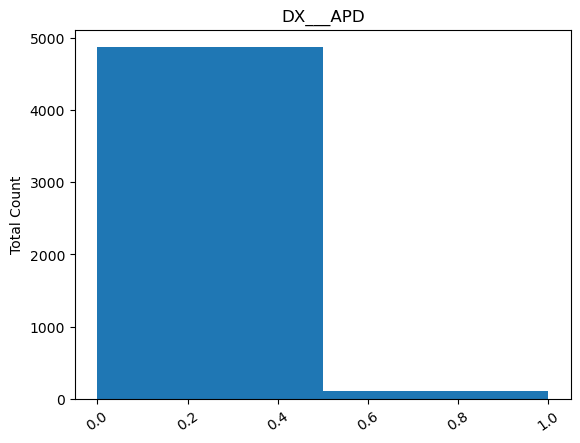

DX___ID  | Count Values: 4986
0    4957
1      29
Name: dx___id, dtype: int64


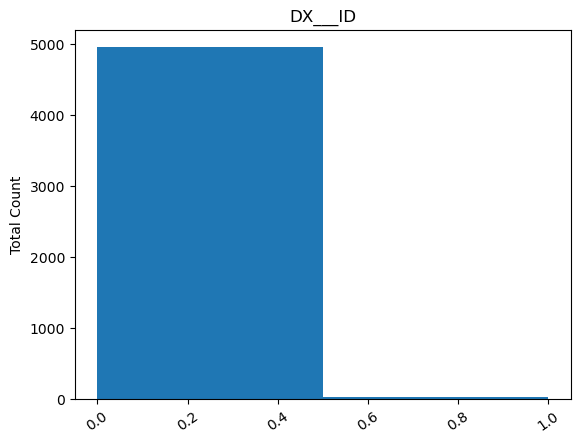

DX___TS  | Count Values: 4986
0    4960
1      26
Name: dx___ts, dtype: int64


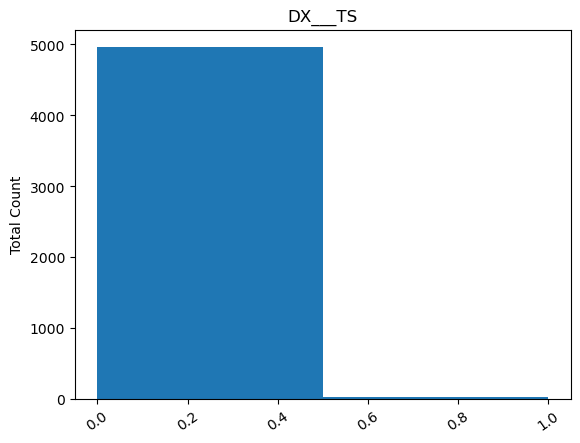

DX___NA  | Count Values: 4986
1    2875
0    2111
Name: dx___na, dtype: int64


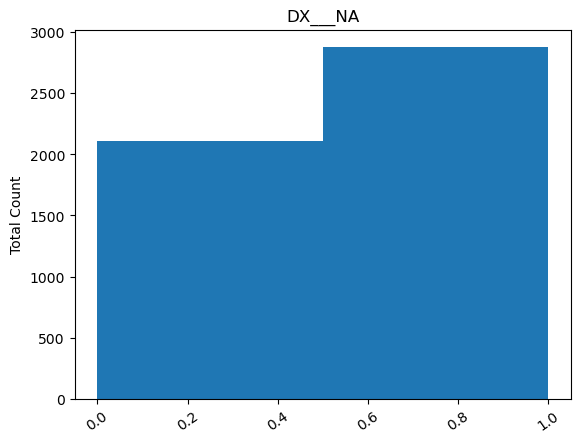

DX___NS  | Count Values: 4986
0    4851
1     135
Name: dx___ns, dtype: int64


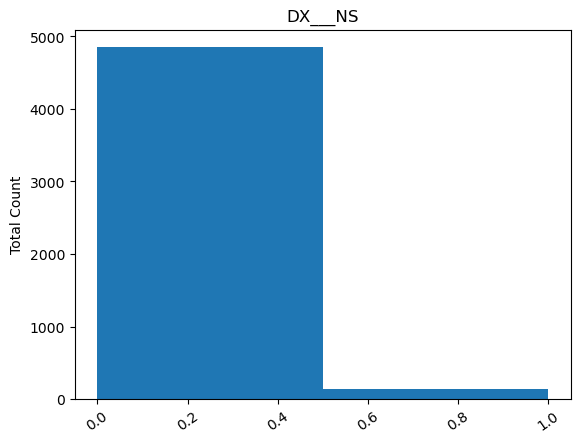

DX___NL  | Count Values: 4986
0    4061
1     925
Name: dx___nl, dtype: int64


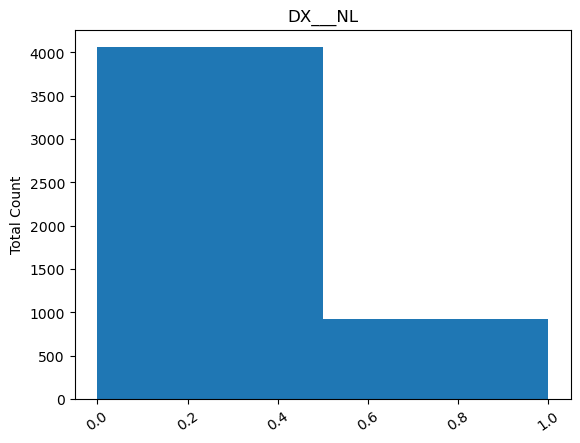

In [ ]:
for i in df_who.columns.to_list():
    if (i not in ['record_id', 'gender_txt','dx_txt', 'postcode']):
        show_summary_histogram(df_who, i)
        

## The Impact of Pain

In [ ]:
df_impact = df[['record_id',
 'respondent_type',
 'completion_rate',
 'age',
 'gender',
 'state',
 'postcode',
 'income_weekly',
 'pn_type___back',
 'pn_type___neck',
 'pn_type___joint',
 'pn_type___migraines',
 'pn_type___widespread',
 'pn_type___osteoarthritis',
 'pn_type___rheumatoid_arthritis',
 'pn_type___pelvic',
 'pn_type___abdominal',
 'pn_type___crps',
 'pn_type___nerve',
 'pn_type___connective_tissue_disorder',
 'pn_type___na',
 'pn_type___nl',
 'pn_type_txt',
 'pn_impact',
 'hc_dx_length',
 'work',
 'life_xp___mental_health',
 'life_xp___ptsd',
 'life_xp___dims',
 'life_xp___unable_work',
 'life_xp___low_productivity',
 'life_xp___strain_financial',
 'life_xp___strain_family',
 'life_xp___strain_friends',
 'life_xp___unable_family',
 'life_xp___less_intimacy',
 'life_xp___inactivity',
 'life_xp___changed_eating',
 'life_xp___less_independence',
 'life_xp___unable_drive',
 'life_xp___na',
 'life_xp___nl',
 'life_xp_txt',
 'hc_sleep_tests',
 'hc_sleep_strategies___reg_schedule',
 'hc_sleep_strategies___less_caffeine_alcohol',
 'hc_sleep_strategies___comfort',
 'hc_sleep_strategies___relaxation',
 'hc_sleep_strategies___less_screen',
 'hc_sleep_strategies___medication',
 'hc_sleep_strategies___bed_mattress',
 'hc_sleep_strategies___na',
 'hc_sleep_strategies___nl',
 'hc_sleep_strategies_txt',
 'dx_covid_status',
 'dx_covid_long',
 'dx_covid_long_pn'
]]

## Accessing Healthcare

In [ ]:
df_access = df[['record_id',
 'respondent_type',
 'completion_rate',
 'age',
 'gender',
 'state',
 'postcode',
 'hc_dx_length',
 'hc_xp_pn_ref_type',
 'hc_xp_pn_wait',
 'hc_xp_pn_appt_type',
 'hc_xp_pn_appt_type_txt',
 'hc_xp_pn_appt_approp',
 'hc_xp_pn_appt_comfort',
 'hc_xp_pn_appt_safe',
 'hc_xp_pn_appt_tailor',
 'hc_xp_pn_appt_txt',
 'hc_xp_pn_appt_rec',
 'hc_xp_pn_appt_rec_txt',
 'cd_mgmt_plan',
 'mh_mgmt_plan',
 'hc_appt___unavailable',
 'hc_appt___closed_books',
 'hc_appt___no_new',
 'hc_appt___no_chronic',
 'hc_appt___na',
 'hc_appt___nl',
 'hc_appt_txt',
 'hc_pn_care_review',
 'hc_pn_care_modal_inp_self',
 'hc_pn_care_modal_inp_supp',
 'hc_pn_care_modal_inp_hcp',
 'hc_pn_care_modal_tlh_self',
 'hc_pn_care_modal_tlh_supp',
 'hc_pn_care_modal_tlh_hcp',
 'hc_pn_care_modal_txt',
 'hc_tlh_location',
 'hc_tlh_location_txt',
 'hc_tlh_opinion',
 'hc_tlh_opinion_txt',
 'hc_opioid_rx___not_aware',
 'hc_opioid_rx___no_change',
 'hc_opioid_rx___choice_reduce',
 'hc_opioid_rx___no_choice_reduce',
 'hc_opioid_rx___ref_physio_psych',
 'hc_opioid_rx___ref_pn_program',
 'hc_opioid_rx___ref_pn_clinic',
 'hc_opioid_rx___na',
 'hc_opioid_rx___nl',
 'hc_opioid_rx_txt',
 'hc_opioid_sub___med_cannabis',
 'hc_opioid_sub___antidepressant',
 'hc_opioid_sub___anticonvulsants',
 'hc_opioid_sub___sedatives',
 'hc_opioid_sub___antiinflammatory',
 'hc_opioid_sub___na',
 'hc_opioid_sub___nl',
 'hc_opioid_sub_txt',
 'hc_pn_mgmt_alt___alcohol',
 'hc_pn_mgmt_alt___cigarettes',
 'hc_pn_mgmt_alt___vaping',
 'hc_pn_mgmt_alt___cannabis_nonmeds',
 'hc_pn_mgmt_alt___recr_substances',
 'hc_pn_mgmt_alt___ns',
 'hc_pn_mgmt_alt___na',
 'hc_pn_mgmt_alt___nl',
 'hc_pn_mgmt_alt_rec_txt',
 'hc_pn_mgmt_alt_txt',
 'hc_pn_mgmt_cnb_meds_acs',
 'hc_pn_mgmt_cnb_meds_help',
 'hc_pn_mgmt_cnb_meds_brr___na',
 'hc_pn_mgmt_cnb_meds_brr___cost',
 'hc_pn_mgmt_cnb_meds_brr___limited_hc_prescriber',
 'hc_pn_mgmt_cnb_meds_brr___limited_availability',
 'hc_pn_mgmt_cnb_meds_brr___limited_dispensaries',
 'hc_pn_mgmt_cnb_meds_brr___stigma',
 'hc_pn_mgmt_cnb_meds_brr___driving_restrictions',
 'hc_pn_mgmt_cnb_meds_brr___side_effects',
 'hc_pn_mgmt_cnb_meds_brr___nl',
 'pwp_ac_mc3_other'
]]

## Affording Healthcare

In [ ]:
df.columns.to_list()

In [ ]:
df[['gender','gender_txt']].loc[df['gender_txt'].notna()]

In [ ]:
df['gender'].value_counts()